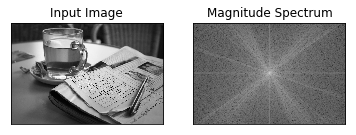

In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('sudoku.jpg',0)
f = np.fft.fft2(img) #fourier
fshift = np.fft.fftshift(f) #shift it to the center
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

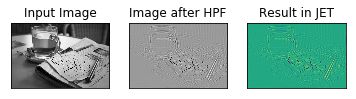

In [14]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('sudoku.jpg',0)

rows, cols = img.shape
crow,ccol = rows//2 , cols//2 #2 times division

fshift[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift = np.fft.ifftshift(fshift)

img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

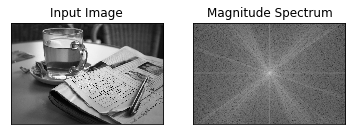

In [17]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('sudoku.jpg',0)

dft = cv.dft(np.float32(img),flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

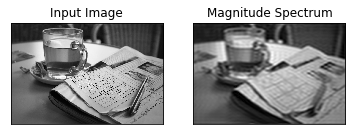

In [21]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('sudoku.jpg',0)

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)

# create a mask first, center square: 1, remaining: all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()